In [2]:
from manim import *
import numpy as np

config.media_width = "75%"
config.verbosity = "WARNING"

In [3]:
sigma_inner = 1
sigma_outer = 2

y_values = np.array([1, 3, 2, 4, 2.5, 1.75])
x_values = np.arange(0,len(y_values))
y_interp= lambda x: np.interp(x,x_values,y_values)
y_upper_inner = lambda x: np.interp(x,x_values,y_values + sigma_inner)
y_upper_outer = lambda x: np.interp(x,x_values,y_values + sigma_outer)
y_lower_inner = lambda x: np.interp(x,x_values,y_values - sigma_inner)
y_lower_outer = lambda x: np.interp(x,x_values,y_values - sigma_outer)

Manim Community v0.18.1

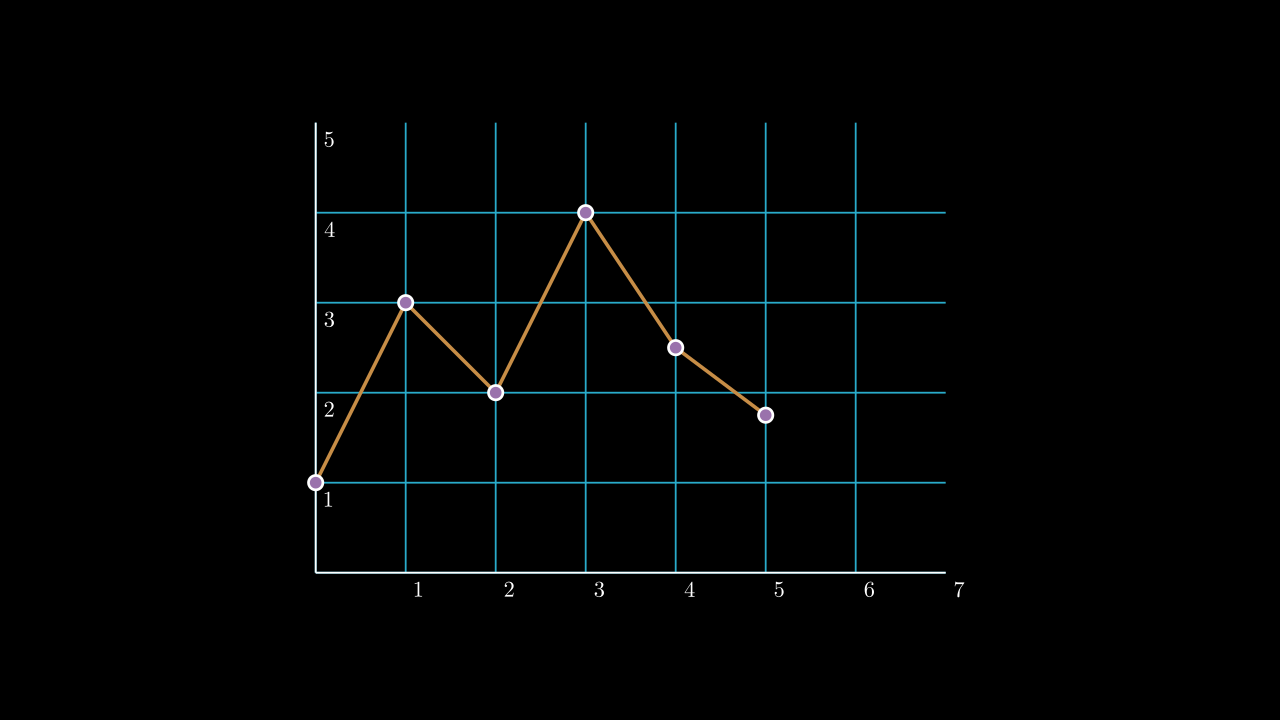

In [4]:
%%manim -qm Tolerance

class Tolerance(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (0, 7),
            y_range = (0, 5),
            x_length = 7,
            axis_config={"include_numbers": True},
        )
        plane.center()
        line_graph = plane.plot_line_graph(
            x_values = x_values,
            y_values = y_values,
            line_color=GOLD_E,
            vertex_dot_style=dict(stroke_width=3,  fill_color=PURPLE),
            stroke_width = 4,
        )
        self.add(plane, line_graph)

Manim Community v0.18.1

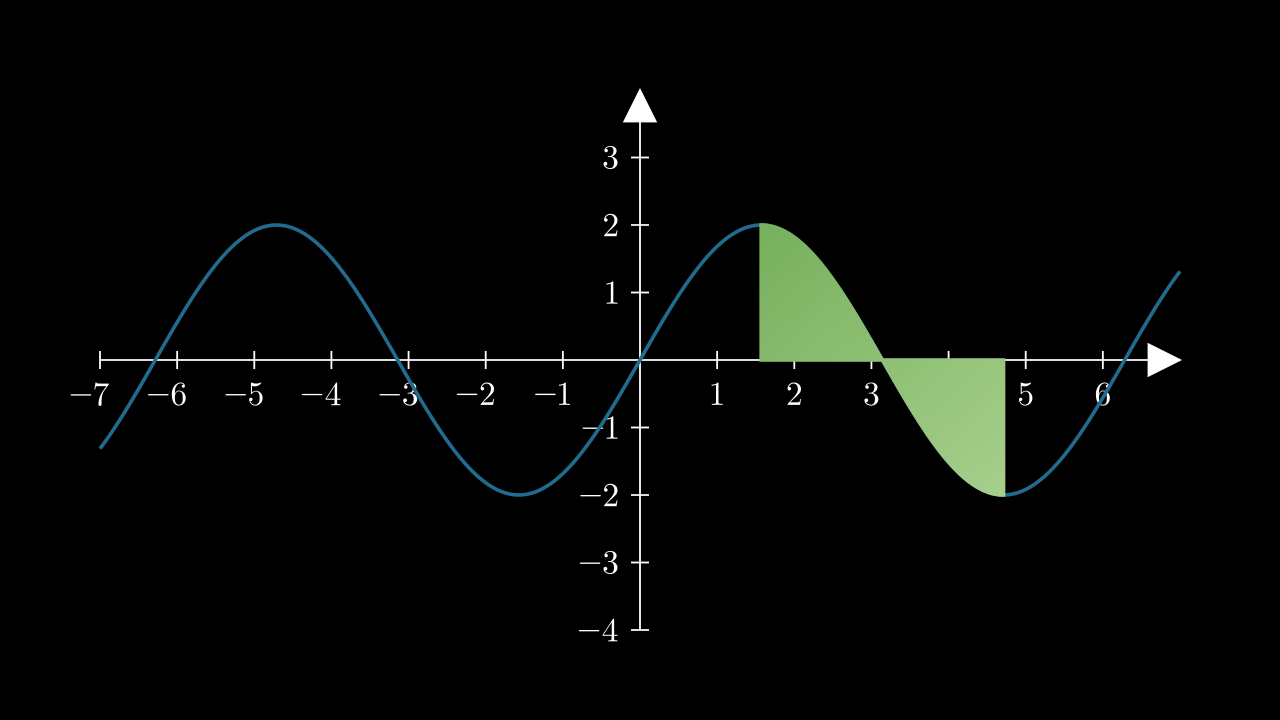

In [5]:
%%manim -qm GetAreaExample
class GetAreaExample(Scene):
    def construct(self):
        ax = Axes().add_coordinates()
        curve = ax.plot(lambda x: 2 * np.sin(x), color=DARK_BLUE)
        area = ax.get_area(
            curve,
            x_range=(PI / 2, 3 * PI / 2),
            color=(GREEN_B, GREEN_D),
            opacity=1,
        )

        self.add(ax, curve, area)

In [9]:
%%manim -qm AeraCorridor
class AeraCorridor(Scene):
    def construct(self):
        """
        ax = NumberPlane(
            x_range = (0, 6),
            y_range = (0, 6),
            x_length = 7,
            axis_config={"include_numbers": True},
        )
        """
        ax = Axes(
            x_range = (0, 6),
            y_range = (0, 6),
            x_length = 7,
            axis_config={"include_numbers": True},
        )
        
        ax.center()
        
        # ax = Axes().add_coordinates()
        line_graph = ax.plot_line_graph(
            x_values = x_values,
            y_values = y_values,
            line_color=GOLD_E,
            vertex_dot_style=dict(stroke_width=3,  fill_color=PURPLE),
            stroke_width = 4,
        )
      
        curve = ax.plot(
            y_interp,
            x_range = (x_values[0], x_values[-1],1),
            color=DARK_BLUE,
            use_smoothing = False,
        )
        
        c_upper_outer = ax.plot(
            y_upper_outer,
            x_range = (x_values[0], x_values[-1],1),
            color=RED,
            use_smoothing = False
        )
        
        c_upper_inner = ax.plot(
            y_upper_inner,
            x_range = (x_values[0], x_values[-1],1),
            color=GREEN_D,
            use_smoothing = False
        )
        
        c_lower_outer = ax.plot(
            y_lower_outer,
            x_range = (x_values[0], x_values[-1],1),
            color=RED,
            use_smoothing = False
        )
        
        c_lower_inner = ax.plot(
            y_lower_inner,
            x_range = (x_values[0], x_values[-1],1),
            color=GREEN_D,
            use_smoothing = False
        )
        
        
        area = ax.get_area(
            c_upper_inner,
            x_range=(x_values[0], x_values[-1]),
            color=(GREEN_B, GREEN_D),
            opacity=.5,
            bounded_graph = c_lower_inner,
        )
        
        title = Text("Korridor Norm")
        text=MathTex(
            "\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+",
            "g(x)\\frac{d}{dx}f(x)"
        )
        v_group = VGroup(Text("Korridor Norm - ISO 18571", font="Arial" ))
        self.play(Write(v_group.arrange(DOWN)))
        self.wait()
        self.play(Uncreate(v_group))
        self.play(FadeIn(ax))
        self.play(Create(line_graph))
        self.play(Create(c_upper_inner))
        self.play(Create(c_lower_inner))
        self.play(FadeIn(area))

        """
        self.add(area,
                 line_graph,  
               #  c_upper_inner, 
                 
                 c_upper_outer,
                 )
        """

Manim Community v0.18.1